In [1]:
# Import necessary libraries
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Add repository root to path for imports
sys.path.append('..')

# Set display options
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-whitegrid')

In [3]:
# Import our data loading modules
from glaucoma.config import Config
from glaucoma.data.loader import DatasetLoader, save_dataset
from glaucoma.data.dataset import SquareImageDataset
from glaucoma.utils.logging import setup_logger

# Set up logging
logger = setup_logger('notebook', level='info')

In [7]:
# Create configuration (modify paths as needed)
config = Config()

# Update data directories to point to your data location
config.data.data_dirs = {
    'REFUGE': {
        'images': '../data/REFUGE/Images_Square',
        'masks': '../data/REFUGE/Masks_Square'
    },
    'ORIGA': {
        'images': '../data/ORIGA/Images_Square',
        'masks': '../data/ORIGA/Masks_Square'
    },
    'G1020': {
        'images': '../data/G1020/Images_Square',
        'masks': '../data/G1020/Masks_Square'
    }
}

# Print the configuration
print("Data directories:")
for dataset, paths in config.data.data_dirs.items():
    print(f"  {dataset}:")
    for key, path in paths.items():
        exists = Path(path).exists()
        status = "✅" if exists else "❌"
        print(f"    {key}: {path} {status}")

Data directories:
  REFUGE:
    images: ../data/REFUGE/Images_Square ✅
    masks: ../data/REFUGE/Masks_Square ✅
  ORIGA:
    images: ../data/ORIGA/Images_Square ✅
    masks: ../data/ORIGA/Masks_Square ✅
  G1020:
    images: ../data/G1020/Images_Square ✅
    masks: ../data/G1020/Masks_Square ✅


In [9]:
# Create dataset loader
loader = DatasetLoader(config.data.data_dirs)

# Load each individual dataset
datasets = {}
for dataset_name in config.data.data_dirs.keys():
    df = loader.load_dataset(dataset_name)
    if not df.empty:
        datasets[dataset_name] = df
        print(f"Loaded {len(df)} samples from {dataset_name}")
    else:
        print(f"No data found for {dataset_name}")

INFO:data_loader:Loading REFUGE dataset
INFO:data_loader:Adding image information for REFUGE
Sampling REFUGE images: 100%|████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 31.08it/s]
INFO:data_loader:Loaded 1200 valid samples from REFUGE
INFO:data_loader:Loading ORIGA dataset
INFO:data_loader:Adding image information for ORIGA


Loaded 1200 samples from REFUGE


Sampling ORIGA images: 100%|█████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 88.82it/s]
INFO:data_loader:Loaded 650 valid samples from ORIGA
INFO:data_loader:Loading G1020 dataset


Loaded 650 samples from ORIGA


INFO:data_loader:Adding image information for G1020
Sampling G1020 images: 100%|█████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 87.52it/s]
INFO:data_loader:Loaded 1020 valid samples from G1020


Loaded 1020 samples from G1020


In [11]:
# Load all datasets at once
all_data = loader.load_all_datasets()
print(f"Loaded {len(all_data)} total samples")

INFO:data_loader:Loading REFUGE dataset
INFO:data_loader:Adding image information for REFUGE
Sampling REFUGE images: 100%|████████████████████████████████████████████████████████| 100/100 [00:03<00:00, 31.22it/s]
INFO:data_loader:Loaded 1200 valid samples from REFUGE
INFO:data_loader:Loading ORIGA dataset
INFO:data_loader:Adding image information for ORIGA
Sampling ORIGA images: 100%|████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 111.08it/s]
INFO:data_loader:Loaded 650 valid samples from ORIGA
INFO:data_loader:Loading G1020 dataset
INFO:data_loader:Adding image information for G1020
Sampling G1020 images: 100%|████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 119.43it/s]
INFO:data_loader:Loaded 1020 valid samples from G1020
INFO:data_loader:Consolidated dataset contains 2870 samples
INFO:data_loader:  - REFUGE: 1200 samples (41.8%)
INFO:data_loader:  - G1020: 1020 samples (35.5%)
INFO:data_loader:  - ORIGA: 650 samples (22.

Loaded 2870 total samples


In [13]:
# Display the first few rows
all_data.head()

,filename,image_path,mask_path,dataset,image_height,image_width
0,T0001,../data/REFUGE/Images_Square\T0001.jpg,../data/REFUGE/Masks_Square\T0001.png,REFUGE,NaN,NaN
1,T0002,../data/REFUGE/Images_Square\T0002.jpg,../data/REFUGE/Masks_Square\T0002.png,REFUGE,NaN,NaN
2,T0003,../data/REFUGE/Images_Square\T0003.jpg,../data/REFUGE/Masks_Square\T0003.png,REFUGE,NaN,NaN
3,T0004,../data/REFUGE/Images_Square\T0004.jpg,../data/REFUGE/Masks_Square\T0004.png,REFUGE,NaN,NaN
4,T0005,../data/REFUGE/Images_Square\T0005.jpg,../data/REFUGE/Masks_Square\T0005.png,REFUGE,NaN,NaN


In [17]:
# Get dataset statistics
stats = loader.analyze_dataset(all_data)

# Print statistics
print("Dataset Statistics:")
for key, value in stats.items():
    print(f"\n{key.replace('_', ' ').title()}:")
    if isinstance(value, dict):
        for k, v in value.items():
            print(f"  - {k}: {v}")
    else:
        print(f"  {value}")

Dataset Statistics:

Num Samples:
  2870

Datasets:
  - REFUGE: 1200
  - G1020: 1020
  - ORIGA: 650

Avg Width:
  935.0

Avg Height:
  928.2

Min Width:
  512.0

Min Height:
  512.0

Max Width:
  2124.0

Max Height:
  2056.0


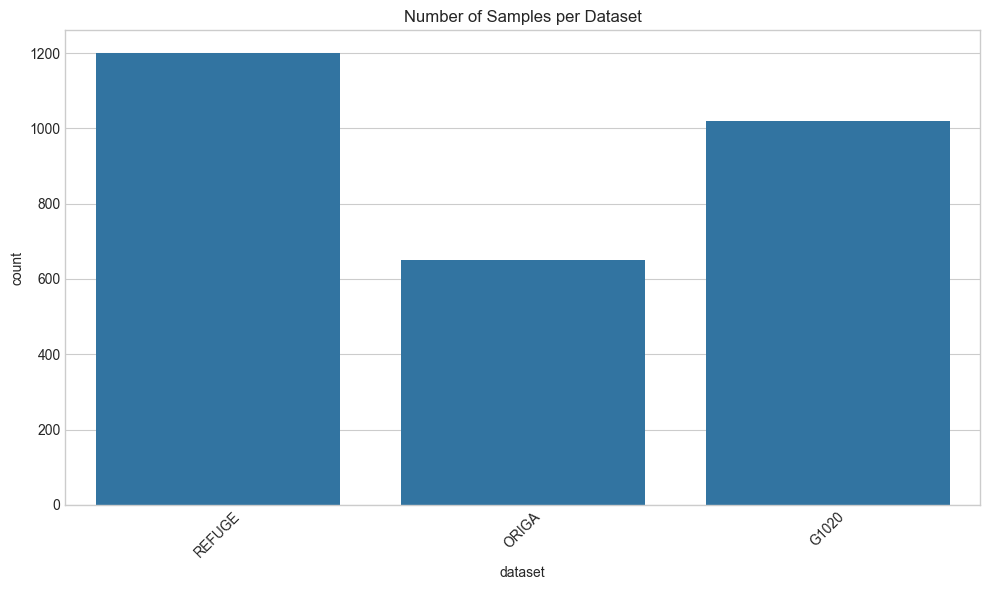

In [19]:
# Plot dataset distribution
if 'dataset' in all_data.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=all_data, x='dataset')
    plt.title('Number of Samples per Dataset')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

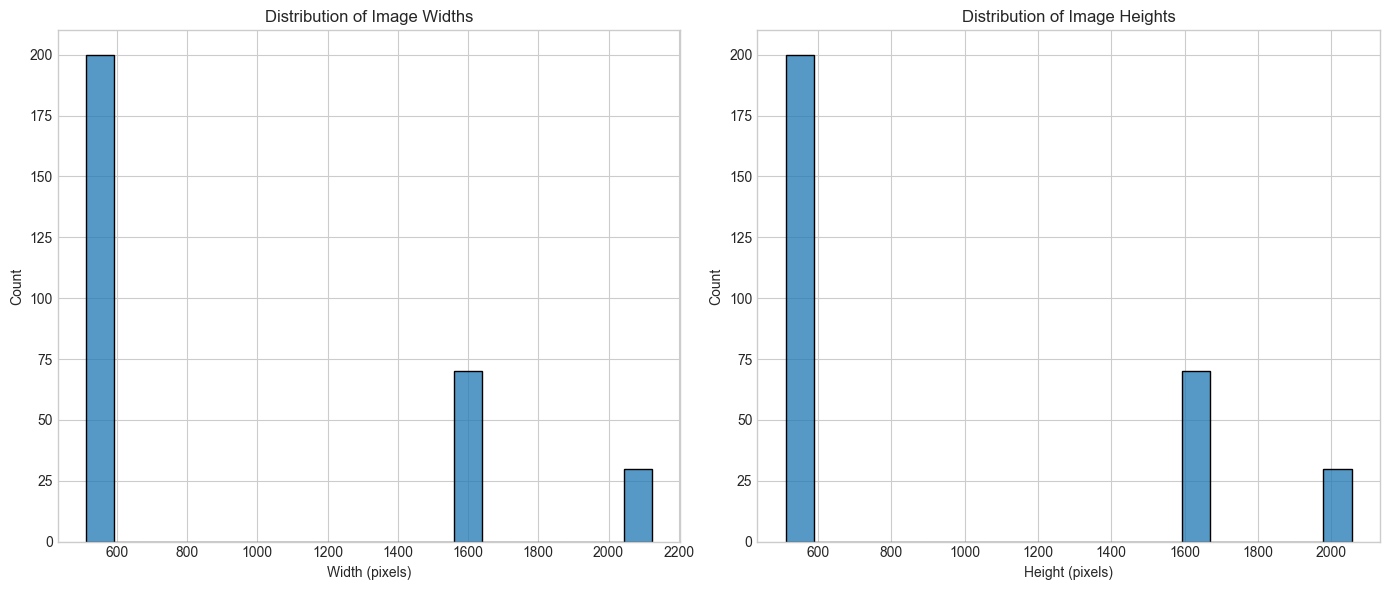

In [21]:
# Analyze image dimensions
if 'image_width' in all_data.columns and 'image_height' in all_data.columns:
    plt.figure(figsize=(14, 6))
    
    # Plot image widths
    plt.subplot(1, 2, 1)
    sns.histplot(all_data['image_width'], bins=20)
    plt.title('Distribution of Image Widths')
    plt.xlabel('Width (pixels)')
    
    # Plot image heights
    plt.subplot(1, 2, 2)
    sns.histplot(all_data['image_height'], bins=20)
    plt.title('Distribution of Image Heights')
    plt.xlabel('Height (pixels)')
    
    plt.tight_layout()
    plt.show()

In [23]:
# Test our SquareImageDataset class
if not all_data.empty:
    # Take a small sample
    sample_df = all_data.head(5)
    
    # Create dataset
    test_dataset = SquareImageDataset(
        sample_df,
        target_size=(224, 224),
        cache_size=5,
        prefetch_size=0,
        mode='segmentation'
    )
    
    # Get a sample
    image, mask = test_dataset[0]
    
    print(f"Image tensor shape: {image.shape}")
    print(f"Mask tensor shape: {mask.shape}")

Image tensor shape: torch.Size([3, 224, 224])
Mask tensor shape: torch.Size([1, 224, 224])


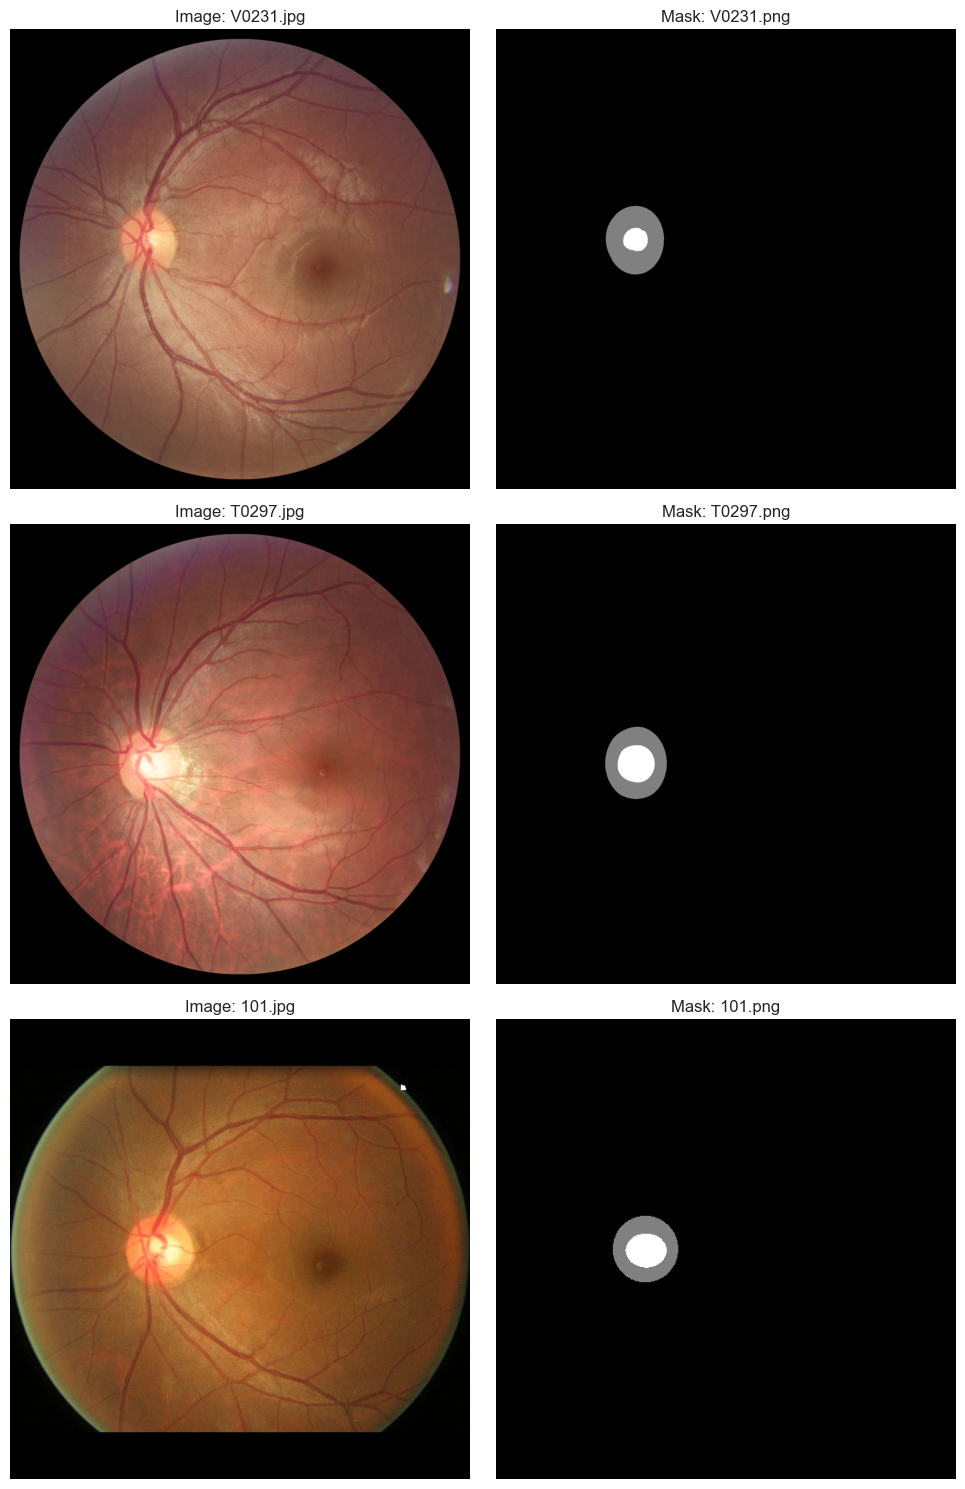

In [25]:
# Visualize a few sample images with masks
if not all_data.empty:
    sample_size = min(3, len(all_data))
    sample_indices = np.random.choice(len(all_data), sample_size, replace=False)
    
    fig, axes = plt.subplots(sample_size, 2, figsize=(10, 5 * sample_size))
    
    for i, idx in enumerate(sample_indices):
        # Get sample
        image_path = all_data.iloc[idx]['image_path']
        mask_path = all_data.iloc[idx]['mask_path']
        
        # Load image using OpenCV
        import cv2
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        
        # Plot image
        axes[i, 0].imshow(image)
        axes[i, 0].set_title(f"Image: {Path(image_path).name}")
        axes[i, 0].axis('off')
        
        # Plot mask
        axes[i, 1].imshow(mask, cmap='gray')
        axes[i, 1].set_title(f"Mask: {Path(mask_path).name}")
        axes[i, 1].axis('off')
    
    plt.tight_layout()
    plt.show()

INFO:data_loader:Dataset split distribution:
INFO:data_loader:  - train: 2008 samples (70.0%)
INFO:data_loader:  - val: 431 samples (15.0%)
INFO:data_loader:  - test: 431 samples (15.0%)
INFO:data_loader:Saved dataset with 2870 samples to ..\data\processed\consolidated_dataset.csv


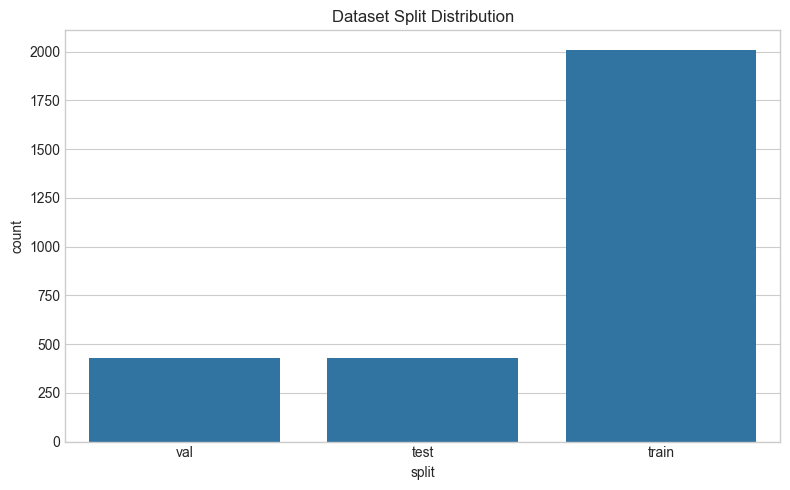

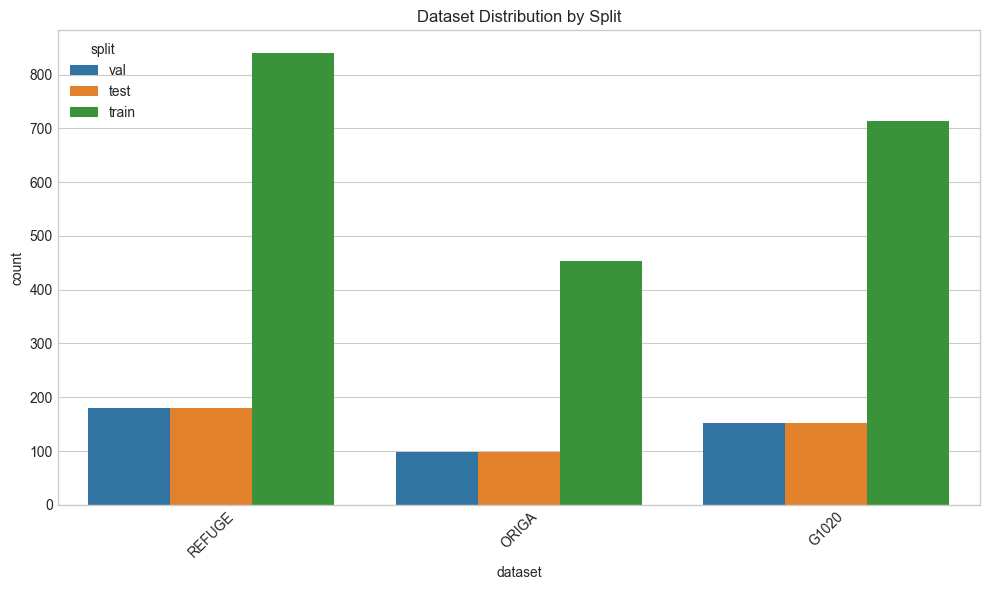

In [27]:
# Create and save dataset with train/val/test splits
if not all_data.empty:
    output_dir = Path('../data/processed')
    output_dir.mkdir(exist_ok=True, parents=True)
    
    save_dataset(
        all_data,
        output_dir / 'consolidated_dataset.csv',
        create_splits=True,
        train_ratio=config.data.train_ratio,
        val_ratio=config.data.val_ratio,
        random_state=config.data.random_state
    )
    
    # Load the saved dataset
    split_df = pd.read_csv(output_dir / 'consolidated_dataset.csv')
    
    # Show split distribution
    if 'split' in split_df.columns:
        plt.figure(figsize=(8, 5))
        sns.countplot(data=split_df, x='split')
        plt.title('Dataset Split Distribution')
        plt.tight_layout()
        plt.show()
        
        # Show dataset distribution within splits
        if 'dataset' in split_df.columns:
            plt.figure(figsize=(10, 6))
            sns.countplot(data=split_df, x='dataset', hue='split')
            plt.title('Dataset Distribution by Split')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

INFO:data_loader:Dataset split distribution:
INFO:data_loader:  - train: 2008 samples (70.0%)
INFO:data_loader:  - val: 431 samples (15.0%)
INFO:data_loader:  - test: 431 samples (15.0%)
INFO:data_loader:Saved dataset with 2870 samples to ..\data\processed\consolidated_dataset.csv


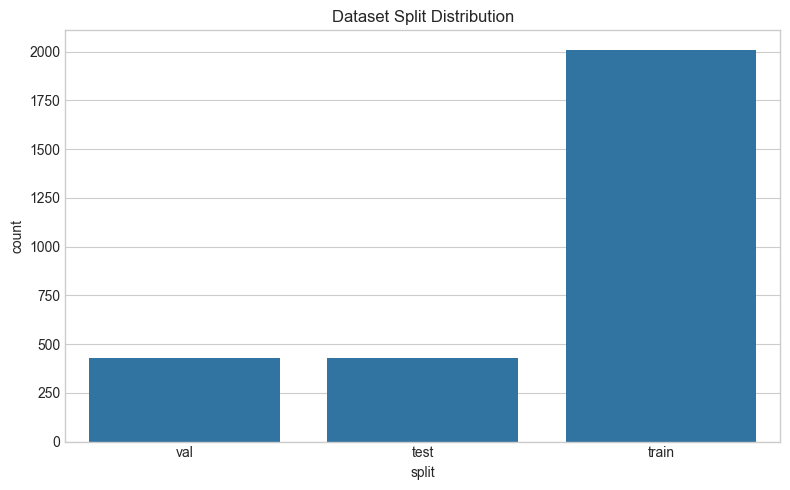

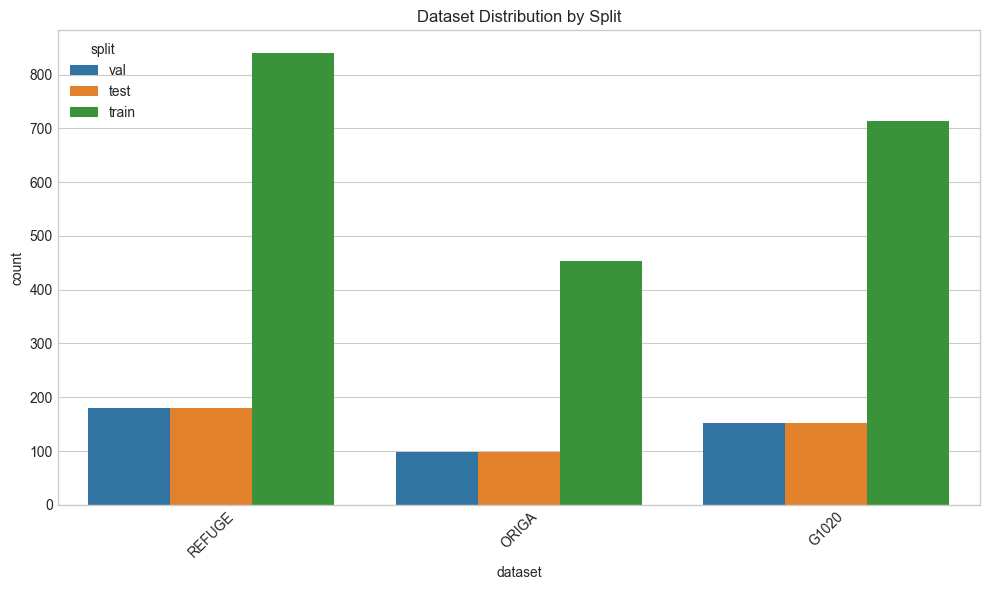

In [29]:
# Create and save dataset with train/val/test splits
if not all_data.empty:
    output_dir = Path('../data/processed')
    output_dir.mkdir(exist_ok=True, parents=True)
    
    save_dataset(
        all_data,
        output_dir / 'consolidated_dataset.csv',
        create_splits=True,
        train_ratio=config.data.train_ratio,
        val_ratio=config.data.val_ratio,
        random_state=config.data.random_state
    )
    
    # Load the saved dataset
    split_df = pd.read_csv(output_dir / 'consolidated_dataset.csv')
    
    # Show split distribution
    if 'split' in split_df.columns:
        plt.figure(figsize=(8, 5))
        sns.countplot(data=split_df, x='split')
        plt.title('Dataset Split Distribution')
        plt.tight_layout()
        plt.show()
        
        # Show dataset distribution within splits
        if 'dataset' in split_df.columns:
            plt.figure(figsize=(10, 6))
            sns.countplot(data=split_df, x='dataset', hue='split')
            plt.title('Dataset Distribution by Split')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

C:\Users\vaibh\anaconda3\envs\cuda_env\lib\site-packages\albumentations\core\validation.py:87: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


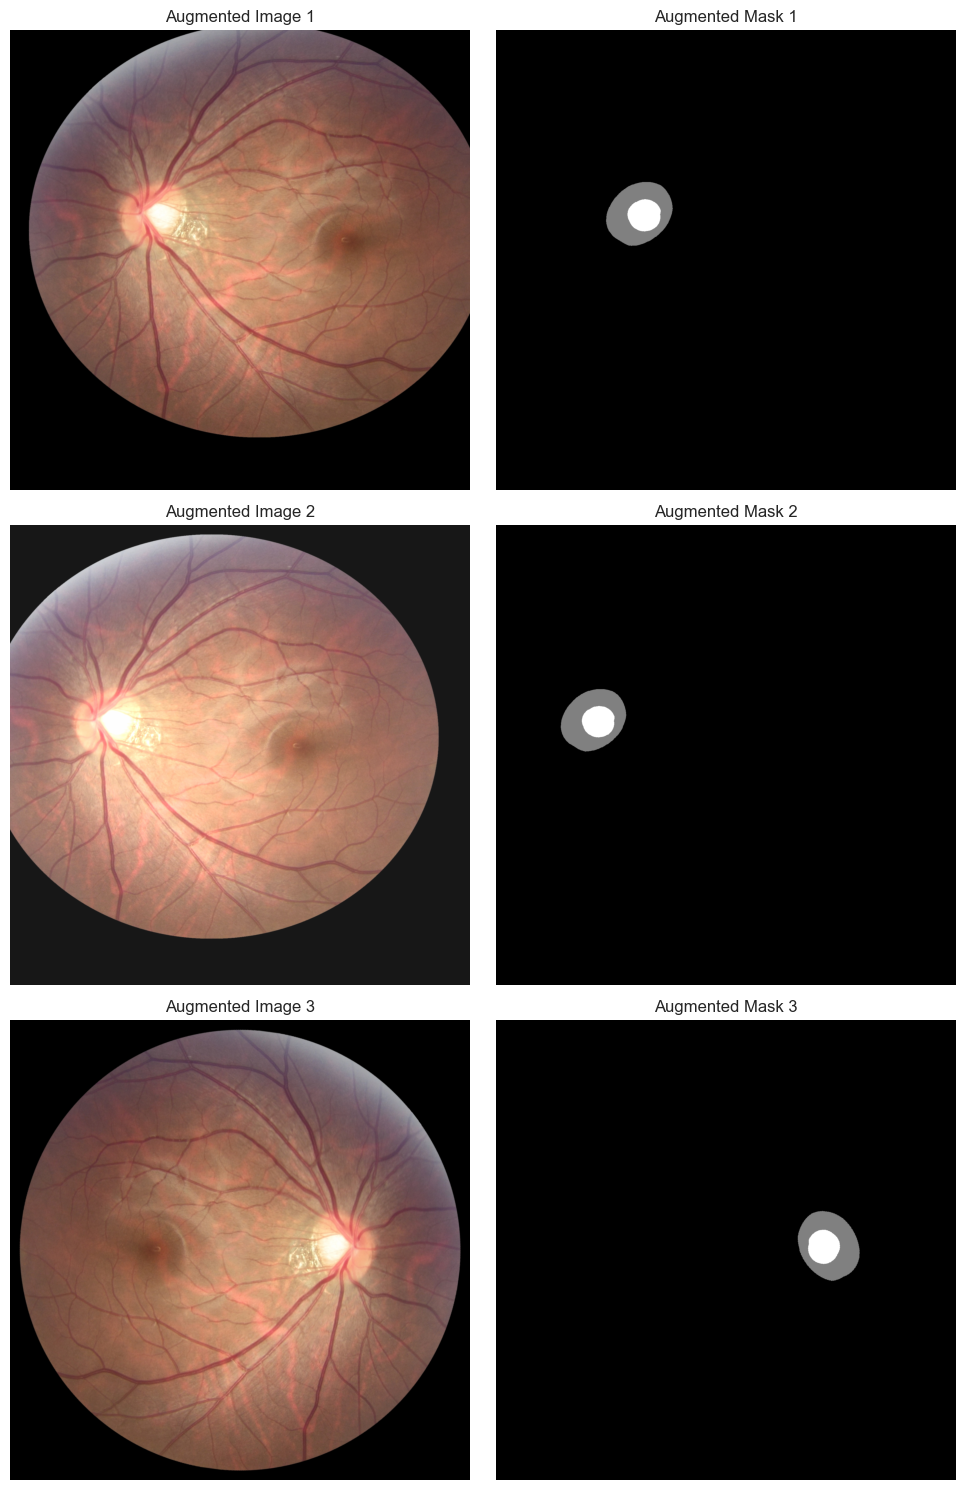

In [31]:
# Test data augmentation
from glaucoma.data.augmentation import get_training_augmentations

if not all_data.empty:
    # Get a sample image
    sample_idx = 0
    image_path = all_data.iloc[sample_idx]['image_path']
    mask_path = all_data.iloc[sample_idx]['mask_path']
    
    # Load image and mask
    import cv2
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    
    # Create augmentation transform
    transform = get_training_augmentations(
        image_size=(224, 224),
        rotation_range=15,
        shift_range=0.1,
        scale_range=0.1,
        brightness_contrast_range=0.2,
        horizontal_flip=True
    )
    
    # Apply augmentation multiple times
    num_samples = 3
    fig, axes = plt.subplots(num_samples, 2, figsize=(10, 5 * num_samples))
    
    for i in range(num_samples):
        # Apply transform
        augmented = transform(image=image, mask=mask)
        aug_image = augmented['image']
        aug_mask = augmented['mask']
        
        # Convert from tensor to numpy for visualization
        aug_image_np = aug_image.permute(1, 2, 0).numpy()
        aug_mask_np = aug_mask.numpy()
        
        # Undo normalization for visualization (approximate)
        aug_image_np = aug_image_np * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406]
        aug_image_np = np.clip(aug_image_np, 0, 1)
        
        # Plot
        axes[i, 0].imshow(aug_image_np)
        axes[i, 0].set_title(f"Augmented Image {i+1}")
        axes[i, 0].axis('off')
        
        axes[i, 1].imshow(aug_mask_np, cmap='gray')
        axes[i, 1].set_title(f"Augmented Mask {i+1}")
        axes[i, 1].axis('off')
    
    plt.tight_layout()
    plt.show()

Testing memory usage with different cache sizes:


INFO:dataset:Cleared dataset caches


Cache size 1: 0.05 MB


INFO:dataset:Cleared dataset caches


Cache size 5: 0.05 MB


INFO:dataset:Cleared dataset caches


Cache size 10: 0.00 MB


INFO:dataset:Cleared dataset caches


Cache size 20: 0.61 MB


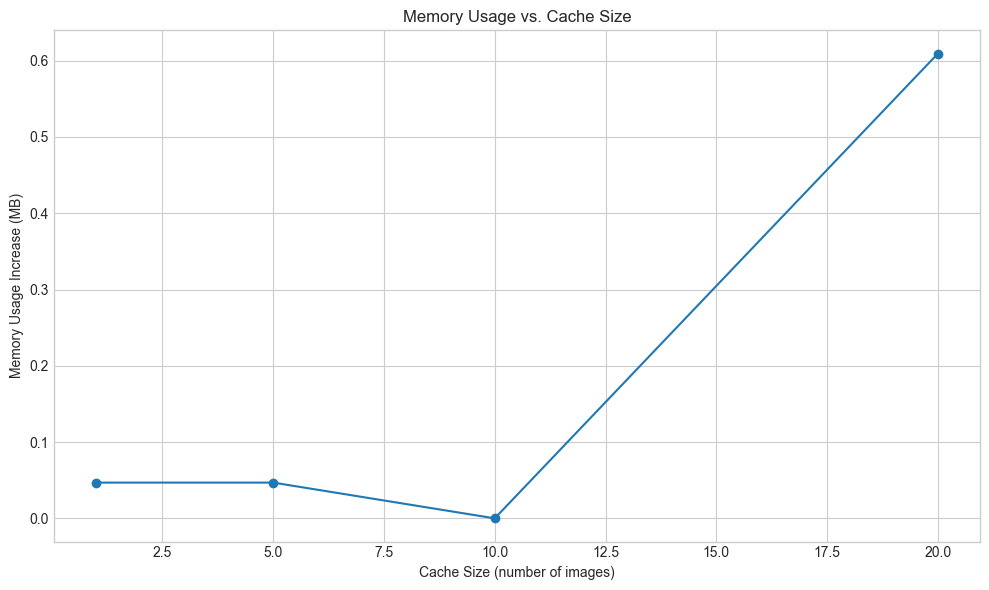

In [39]:
# Test memory usage with different cache sizes
import psutil
import gc

def get_memory_usage():
    """Get current memory usage in MB."""
    process = psutil.Process(os.getpid())
    mem_info = process.memory_info()
    return mem_info.rss / (1024 * 1024)

# Run test with different cache sizes
if len(all_data) > 20:
    cache_sizes = [1, 5, 10, 20]  # Changed from [0, 5, 10, 20]
    memory_usage = []
    
    print("Testing memory usage with different cache sizes:")
    
    for cache_size in cache_sizes:
        # Clear memory
        gc.collect()
        base_memory = get_memory_usage()
        
        # Create dataset with specified cache size
        dataset = SquareImageDataset(
            all_data.head(50),  # Use first 50 samples
            target_size=(224, 224),
            cache_size=cache_size,
            prefetch_size=0,
            mode='segmentation'
        )
        
        # Access all samples to fill cache
        for i in range(min(50, len(dataset))):
            _ = dataset[i]
        
        # Measure memory
        current_memory = get_memory_usage()
        memory_increase = current_memory - base_memory
        
        memory_usage.append(memory_increase)
        print(f"Cache size {cache_size}: {memory_increase:.2f} MB")
        
        # Clean up
        dataset.cleanup()
        del dataset
        gc.collect()
    
    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(cache_sizes, memory_usage, 'o-')
    plt.xlabel('Cache Size (number of images)')
    plt.ylabel('Memory Usage Increase (MB)')
    plt.title('Memory Usage vs. Cache Size')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [37]:
# Save the final processed dataset
if not all_data.empty:
    # Add a column for whether this is square image data
    all_data['is_square_format'] = True
    
    # Save final version
    final_path = Path('../data/processed/final_dataset.csv')
    all_data.to_csv(final_path, index=False)
    
    print(f"Saved final dataset with {len(all_data)} samples to {final_path}")
    print("\nDataset processing completed!")

Saved final dataset with 2870 samples to ..\data\processed\final_dataset.csv

Dataset processing completed!
